# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 17.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requir

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()

Saving foodhub_order.csv to foodhub_order.csv


In [4]:
# Write your code here to read the data
df = pd.read_csv('foodhub_order.csv')

In [5]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Check the number of rows and columns
print("Shape of the data (rows, columns):", df.shape)

Shape of the data (rows, columns): (1898, 9)


#### Observations:
The data contains 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
#The datatypes of the different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The columns include 4 numerical columns with int64 type (order_id, customer_id, food_preparation_time, delivery_time), 1 column with float64 type (cost_of_the_order), and 4 columns with object type (restaurant_name, cuisine_type, day_of_the_week, and rating).


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Check for missing values in each column
df.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values in any of the columns.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Statistical summary of the 'food_preparation_time' column
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:
    Minimum preparation time: 20 minutes

    Average preparation time: ~27.37 minutes

    Maximum preparation time: 35 minutes






### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Count the number of orders with missing or null ratings
df['rating'].isnull().sum()

np.int64(0)

In [11]:
# Count how many orders have 'Not given' as the rating
df[df['rating'] == 'Not given'].shape[0]

736

#### Observations:
There are **zero missing or empty values** in the rating column.
However, in this dataset, unrated orders may be represented as 'Not given', not as NaN. Taking this into account, there are **736 orders without a given rating.**
These might correspond to customers who skipped rating their orders, which could indicate a need to improve the post-delivery feedback process.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [12]:
# Write the code here
df.dtypes


,0
order_id,int64
customer_id,int64
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64


In [13]:
df.nunique()


,0
order_id,1898
customer_id,1200
restaurant_name,178
cuisine_type,14
cost_of_the_order,312
day_of_the_week,2
rating,4
food_preparation_time,16
delivery_time,19


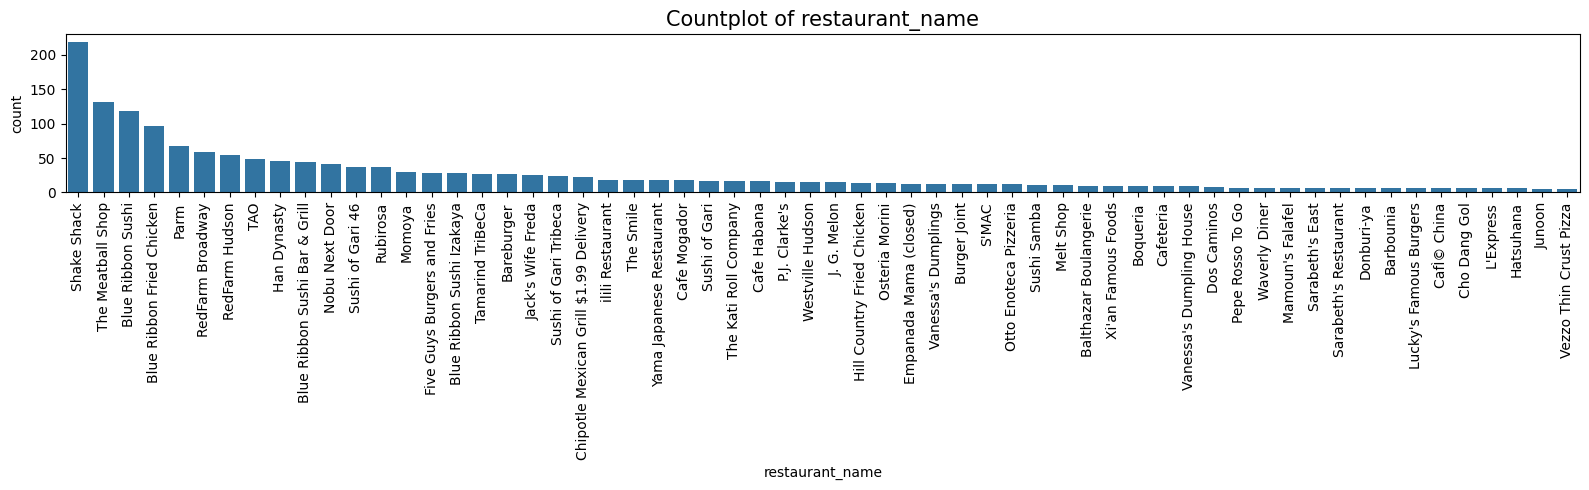

In [14]:
#Explore Categorical Variables, limit to top 60 most frequent restaurant names out of 178 to avoid overcrowding.
top_restaurants = df['restaurant_name'].value_counts().head(60).index

plt.figure(figsize=(16, 5))
sns.countplot(data=df[df['restaurant_name'].isin(top_restaurants)],
              x='restaurant_name',
              order=top_restaurants)

plt.title('Countplot of restaurant_name', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

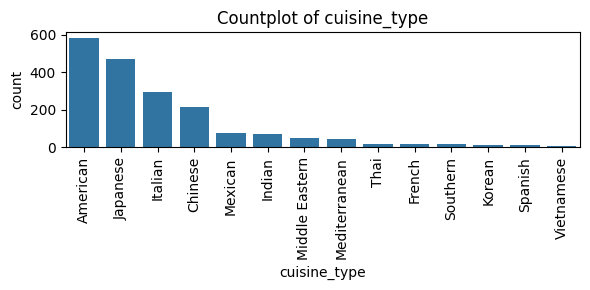

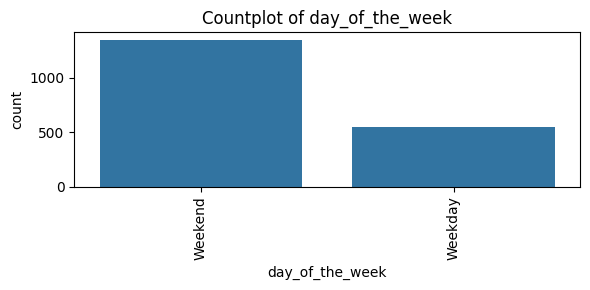

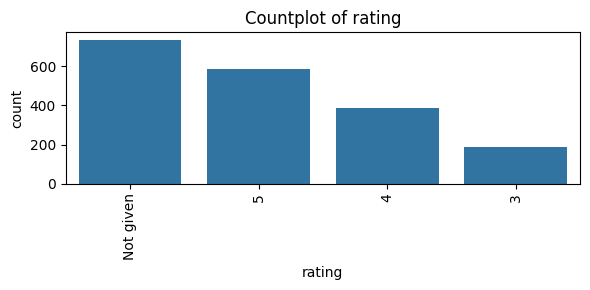

In [15]:
# Explore Categorical Variables (excluding 'restaurant_name')
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols = [col for col in categorical_cols if col != 'restaurant_name']

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()


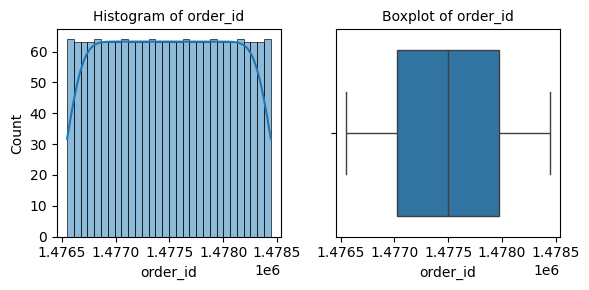

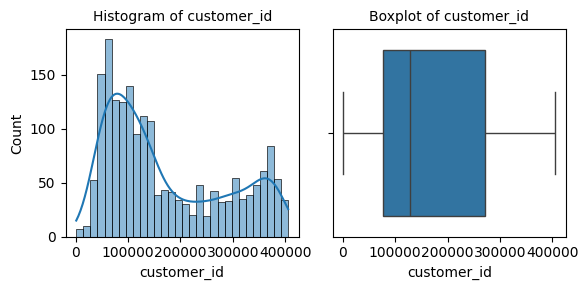

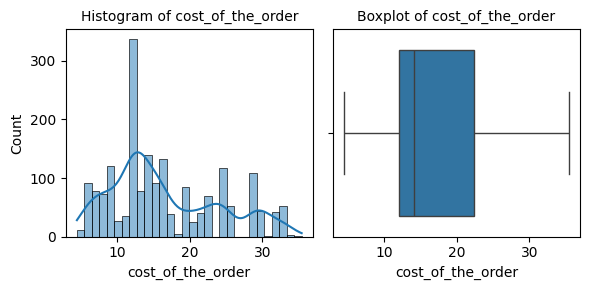

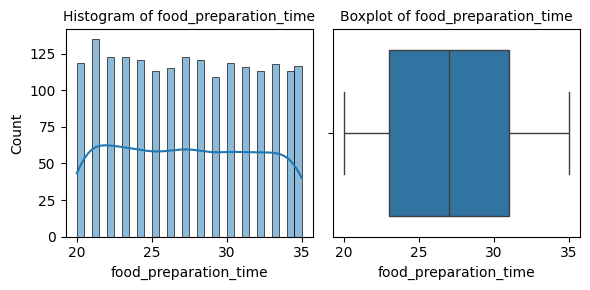

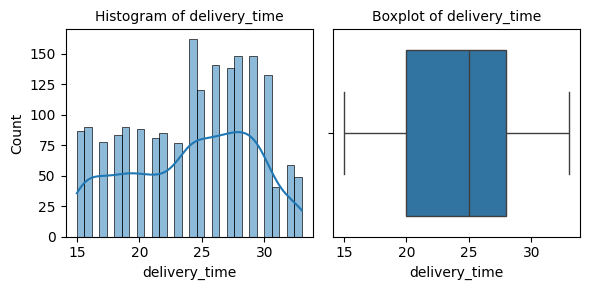

In [16]:
#Explore Numerical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}',fontsize=10)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}',fontsize=10)

    plt.tight_layout()
    plt.show()


In [17]:
Q1 = df['delivery_time'].quantile(0.25)
Q3 = df['delivery_time'].quantile(0.75)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")


Q1 (25th percentile): 20.0
Q3 (75th percentile): 28.0


In [18]:
#Summary Statistics
df.describe(include='all')


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


In [19]:
# Count how many times each customer_id appears
customer_counts = df['customer_id'].value_counts()

# Filter those who appear more than once
repeated_customers = customer_counts[customer_counts > 1]

# Get the number of repeated customer IDs
num_repeated_customers = repeated_customers.count()

print(f"Number of repeated customer IDs: {num_repeated_customers}")


Number of repeated customer IDs: 416


In [20]:
#Checking what percentage of customers are repeat buyers:
total_customers = df['customer_id'].nunique()
percent_repeated = (num_repeated_customers / total_customers) * 100

print(f"Percentage of customers who ordered more than once: {percent_repeated:.2f}%")


Percentage of customers who ordered more than once: 34.67%


#### Observations:
We analyzed the 9 columns, "estaurant_name", "cuisine_type", "day_of_the_week", "rating" and the rest, as categorical and numerical variables, respectively.
1. restaurant_name: There are 178 unique restaurants. The distribution is highly right-skewed (Positive Skewness): a small number of restaurants dominate the order count. This suggests that customers tend to prefer a few specific restaurants, with "Shake Shack" being the most popular among them.
2. Among 1200 "costomer_id", 416 of them were repeated indicating that 34.67% of the costomers has returned to the restaurant.
3. day_of_the_week: Orders are fairly consistent across weekdays but show a spike on weekends (Saturday and Sunday), reflecting increased demand during leisure time.
4. rating: A large proportion of ratings are marked as “Not given”, possibly indicating customers do not frequently leave feedback. Among the given ratings, 5-star ratings dominate, showing generally high satisfaction, but also possibly a bias (only satisfied users rate).
5. Delivery_time: The distribution is left-skewed (negatively skewed), which means that most delivery times are relatively long, and fewer are very short. This is supported by the median being closer to Q3 than Q1 and the longer whisker on the left side of the boxplot. Median delivery time is 25 minutes, showing that half of all deliveries take 25 minutes or less. IQR (Q3 - Q1) = 8 minutes, which is a fairly narrow range, suggesting that delivery times are generally consistent. The left skew suggests that most deliveries take around 25–28 minutes, but some are done very quickly indicating: a) Local customers located very near the restaurant. b) streamlined operations for certain vendors.
6. food_preparation_time: No skew (Symmetrical in shape) which means preperation times are well-managed and consistent.
7. Cost_of_the_order: The boxplot suggests a right-skewed distribution (positively skewed) and the median is much closer to Q1 than to Q3. This implies that most orders are lower-cost, and a smaller number of orders are significantly more expensive, so customers prefer affordable meals, but there's a market for premium offerings.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [21]:
# Top 5 restaurants by number of orders
top_5_restaurants = df['restaurant_name'].value_counts().head(5)

print("Top 5 Restaurants by Number of Orders:")
print(top_5_restaurants)


Top 5 Restaurants by Number of Orders:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
value_counts() counts how many times each restaurant_name appears (i.e., how many orders they received) and .head(5) returns the top 5.
This shows the most popular restaurants by order volume — useful for understanding demand concentration and making decisions about partnerships, promotions, or performance reviews. Shake Shack is at the top of the list with the highest number of received orders (219), followed by The Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried Chicken with 96 orders, and Parm with 68 orders,  which takes the fifth and last spot on the list.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
print(df['day_of_the_week'].unique())


['Weekend' 'Weekday']


In [23]:
# Filter for weekends (Saturday and Sunday)
weekend_data = df[df['day_of_the_week'].isin(['Weekend'])]

# Count the cuisine types on weekends
popular_cuisine_weekends = weekend_data['cuisine_type'].value_counts()

# Display the most popular cuisine
most_popular = popular_cuisine_weekends.idxmax()
count = popular_cuisine_weekends.max()

print(f"The most popular cuisine on weekends is '{most_popular}' with {count} orders.")


The most popular cuisine on weekends is 'American' with 415 orders.


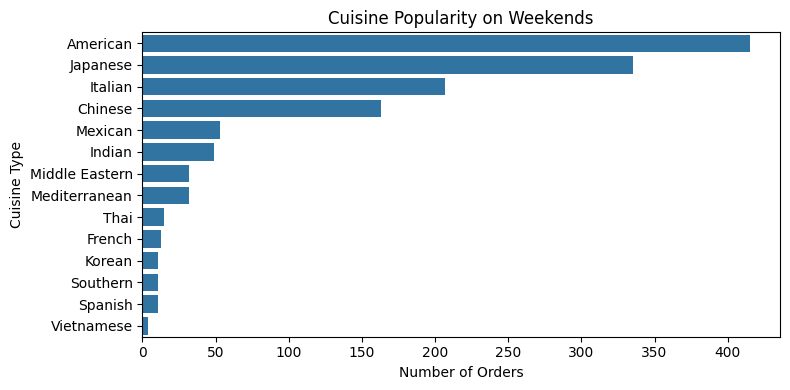

In [24]:
plt.figure(figsize=(8, 4))
sns.countplot(data=weekend_data, y='cuisine_type', order=popular_cuisine_weekends.index)
plt.title('Cuisine Popularity on Weekends')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.tight_layout()
plt.show()


#### Observations:
The most popular cuisine on weekends is 'American' with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [25]:
# Total number of orders
total_orders = df.shape[0]

# Number of orders with cost > 20
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Calculate percentage
percentage_above_20 = (orders_above_20 / total_orders) * 100

print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")


Percentage of orders costing more than $20: 29.24%


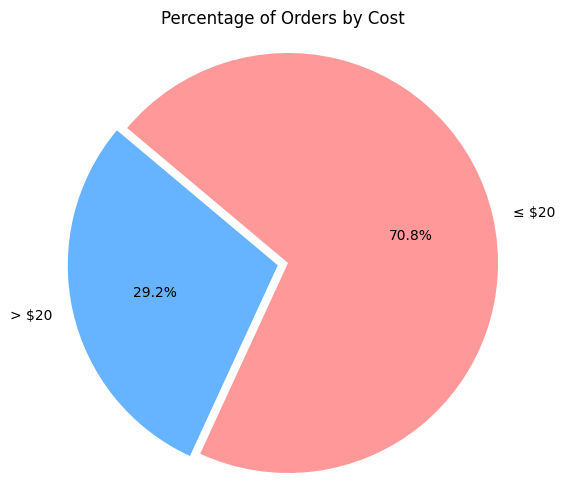

In [26]:
# Count of orders
above_20 = df[df['cost_of_the_order'] > 20].shape[0]
below_or_equal_20 = df[df['cost_of_the_order'] <= 20].shape[0]

# Pie chart labels and sizes
labels = ['> $20', '≤ $20']
sizes = [above_20, below_or_equal_20]
colors = ['#66b3ff', '#ff9999']

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0))
plt.title('Percentage of Orders by Cost')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


#### Observations:
Approximately 29.24% of all orders cost more than $20, which indicates that nearly one-third of the customer base is willing to spend on the higher end of the pricing spectrum. This suggests a significant market segment with higher purchasing power or preference for premium meals, which could include bulk orders, specialty dishes, or add-ons.

From a business perspective, this insight can guide:

    a. Targeted marketing for premium combos or loyalty rewards for high-spending customers.

    b. Menu optimization to highlight or upsell items in the $20+ range.

    c. Personalization strategies on weekends or dinner hours when higher-cost orders might spike.

Understanding this segment can help maximize revenue through better pricing strategies and customer targeting.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [27]:
mean_delivery_time = df['delivery_time'].mean()
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")


Mean order delivery time: 24.16 minutes


#### Observations:
The mean delivery time is 24.16 minutes, which is slightly less than the median (25 minutes). This aligns well with the left-skewed distribution.
From a business perspective, this suggests a generally consistent delivery performance around 25 minutes, with some efficient deliveries happening quickly — possibly for customers located close to the restaurants or due to streamlined operations.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
# Count the number of orders per customer_id
order_counts = df['customer_id'].value_counts()

# Select the top 3 most frequent customers
top_3_customers = order_counts.head(3)

# Display the customer IDs and their order counts
print(top_3_customers)


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
value_counts() counts how many orders each customer_id has and head(3) picks the top 3 customers with the most orders. Accordingly the following top 3 costomers will receive 20% discount vouchers:
Customer ID **52832 with 13 orders**, customer ID **47440 with 10 orders**, and customer ID **83287 with 9 orders**.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


####**Step 1: Explore relationships between numerical variables**

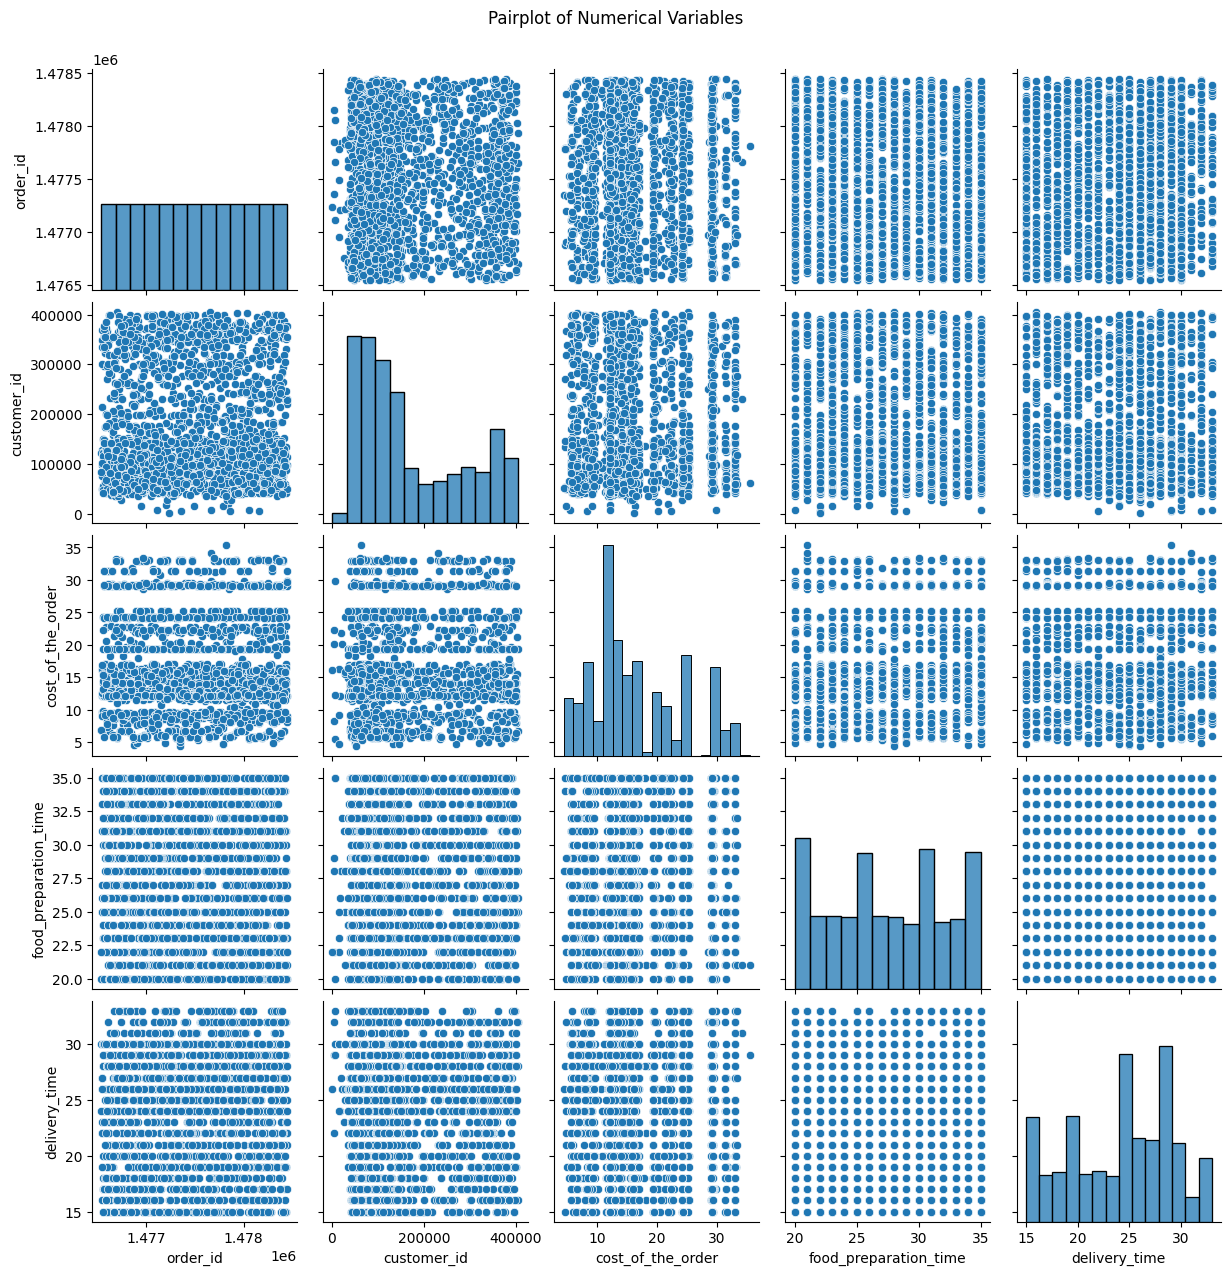

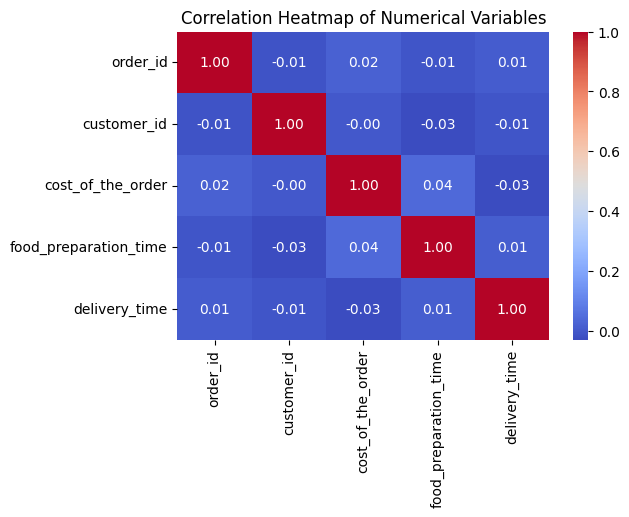

In [70]:
# Select numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Pairplot for numerical variables
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


####**Step 2: Explore relationships between numerical and categorical variables**

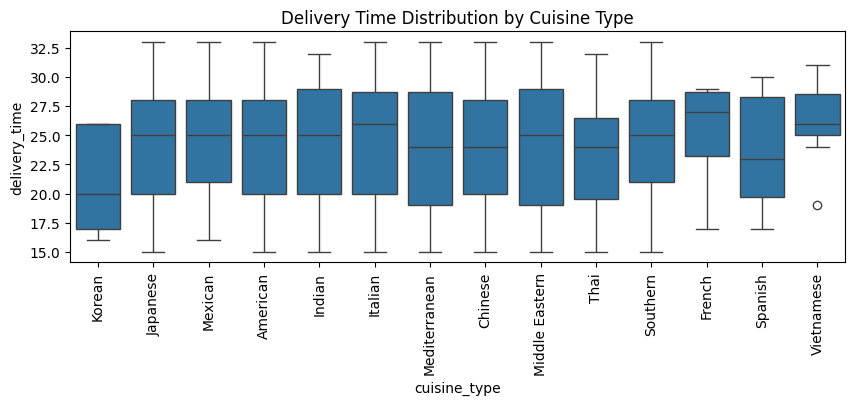

In [75]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='cuisine_type', y='delivery_time', data=df)
plt.title("Delivery Time Distribution by Cuisine Type")
plt.xticks(rotation=90)
plt.show()


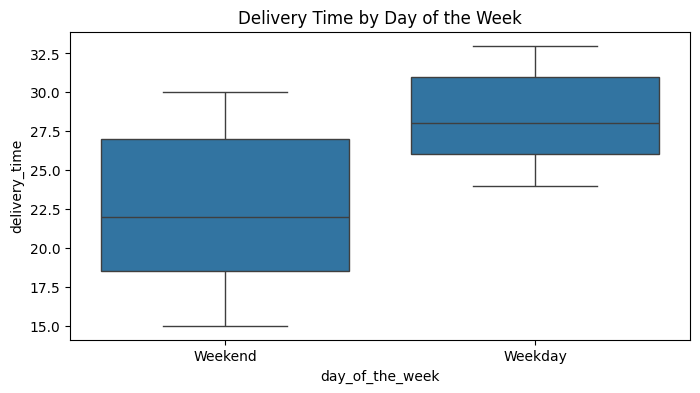

In [67]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time by Day of the Week')
plt.show()

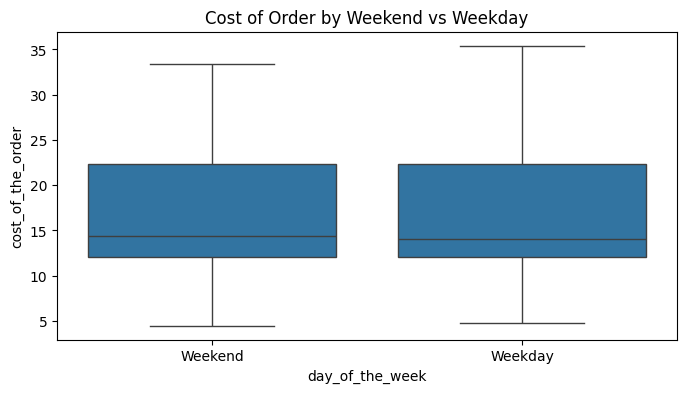

In [59]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title("Cost of Order by Weekend vs Weekday")
plt.show()


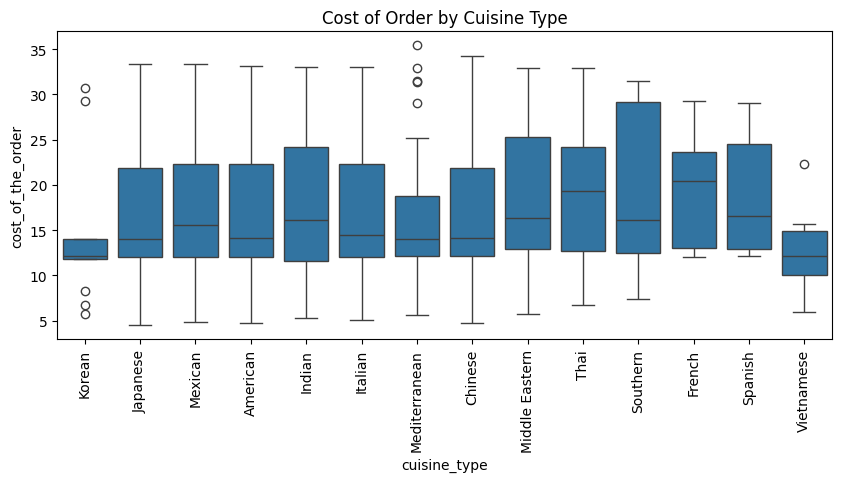

In [68]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Cost of Order by Cuisine Type')
plt.xticks(rotation=90)
plt.show()

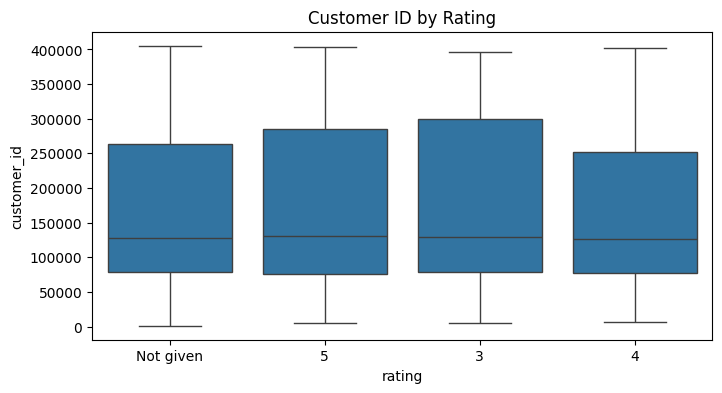

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='rating', y='customer_id', data=df)
plt.title("Customer ID by Rating")
plt.show()

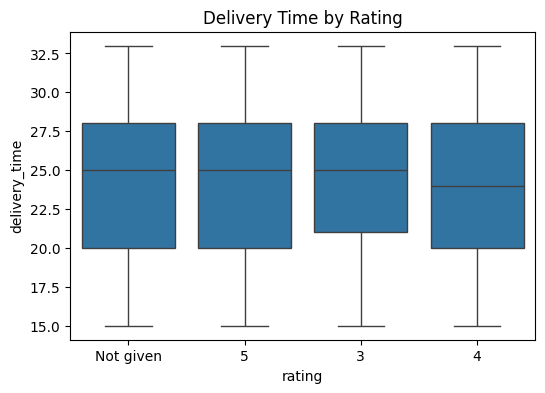

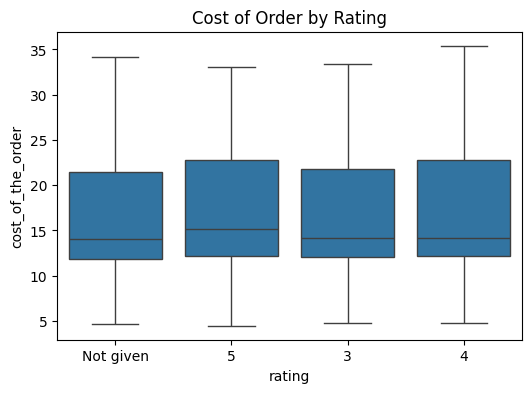

In [69]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='rating', y='delivery_time', data=df)
plt.title('Delivery Time by Rating')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='rating', y='cost_of_the_order', data=df)
plt.title('Cost of Order by Rating')
plt.show()


####**Step 3: Explore relationships between two categorical variables**

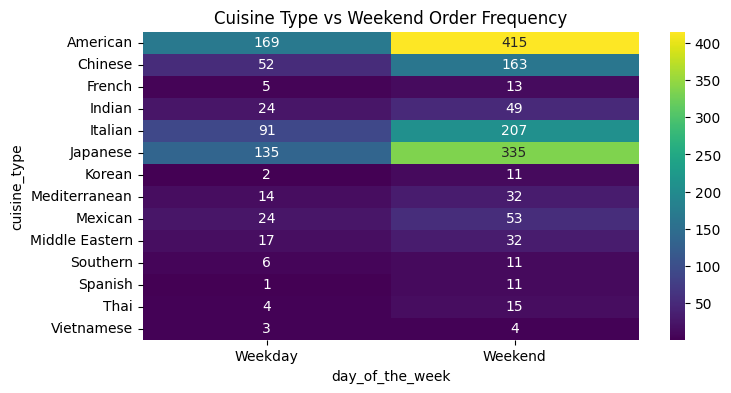

In [74]:
ct = pd.crosstab(df['cuisine_type'], df['day_of_the_week'])

plt.figure(figsize=(8, 4))
sns.heatmap(ct, annot=True, fmt="d", cmap="viridis")
plt.title("Cuisine Type vs Weekend Order Frequency")
plt.show()


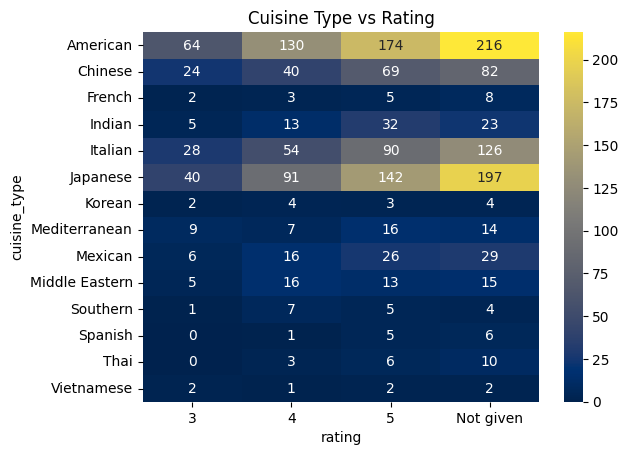

In [51]:
ct1 = pd.crosstab(df['cuisine_type'], df['rating'])
sns.heatmap(ct1, annot=True, cmap='cividis', fmt='d')
plt.title("Cuisine Type vs Rating")
plt.show()


#### Observations:
***Numerical–Numerical:***

a. Cost vs Preparation Time: Generally shows a positive correlation — more expensive orders may take slightly longer to prepare, especially for complex cuisines.

b. Cost vs Delivery Time: Weak correlation — higher cost doesn’t guarantee longer or shorter delivery times, suggesting logistics efficiency.

c. Preparation Time vs Delivery Time: Moderate positive trend — longer food prep may contribute to overall delivery time.


***Categorical–Numerical:***

    Cuisine Type:

Certain cuisines (e.g., Italian or Chinese) may have higher average delivery times.

Some cuisines are consistently more expensive (e.g., Southern > Vietnamese).

    Day of the Week:

Delivery times may peak slightly on weekends.

Orders tend to cost more on weekends, possibly due to combo deals or larger group orders.

    Rating:

Lower ratings sometimes correlate with longer delivery times — indicating potential delivery inefficiencies.

Orders with higher ratings cluster around mid-level costs, suggesting customers value timely, moderately priced food.



***Categorical–Categorical:***

a. Cuisine Type vs Rating:

Popular cuisines (like American, Japenese) receive the most ratings, but also show a wider spread in feedback, indicating mixed satisfaction levels.

b. Cuisine vs Day:

American, Japenese, Italian and Chinese see peaks on weekends — possibly due to convenience and group orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [76]:
# Remove rows with 'Not given' in the rating column
df_valid_ratings = df[df['rating'] != 'Not given'].copy()

# Convert rating column to numeric
df_valid_ratings['rating'] = df_valid_ratings['rating'].astype(float)

# Group by restaurant name and calculate count and mean of ratings
rating_stats = df_valid_ratings.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants that meet the criteria
eligible_restaurants = rating_stats[(rating_stats['count'] > 50) & (rating_stats['mean'] > 4)]

# Display the result
eligible_restaurants = eligible_restaurants.sort_values(by='mean', ascending=False)
eligible_restaurants


,count,mean
restaurant_name,,
The Meatball Shop,84,4.511905
Blue Ribbon Fried Chicken,64,4.328125
Shake Shack,133,4.278195
Blue Ribbon Sushi,73,4.219178


#### Observations:
The filtered restaurants are eligible for the promotional offer, as they have received more than 50 ratings and maintain a high customer satisfaction with an average rating greater than 4. These restaurants are ideal for marketing campaigns, as they are both popular and well-reviewed, making them likely to attract new customers when promoted.

The Meatball Shop is the best performer overall, with the highest average rating of 4.50.
Shake Shack, while ranked third in rating, has the highest number of reviews, showing strong customer demand and widespread recognition.
All four restaurants are strong candidates, but **The Meatball Shop** stands out in terms of customer satisfaction.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [77]:
# Apply commission rates based on cost brackets
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to the dataset
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate the total revenue
total_revenue = df['commission'].sum()

print(f"Net revenue generated by the company: ${total_revenue:.2f}")


Net revenue generated by the company: $6166.30


#### Observations:
This calculation results the total earnings of the company based on a tiered commission structure, which is $6166.30. By prioritizing higher-value orders with a higher commission, the company optimizes its revenue model. The result highlights how significant high-cost orders are to the overall business profitability.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [78]:
# Create a new column for total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count how many orders took more than 60 minutes
over_60 = df[df['total_time'] > 60].shape[0]

# Total number of orders
total_orders = df.shape[0]

# Calculate percentage
percentage_over_60 = (over_60 / total_orders) * 100

print(f"Percentage of orders that take more than 60 minutes: {percentage_over_60:.2f}%")


Percentage of orders that take more than 60 minutes: 10.54%


#### Observations:
**10.54%** of the orders take **more than 60 minutes** from the time the order is placed to when it is delivered.
This indicates that while the majority of orders are fulfilled within an hour, **about 1 in 10 customers face longer wait times**.
This may be acceptable for certain cuisines or peak periods, but it also highlights a potential area for operational improvement — particularly for restaurants with consistently long total times.
Streamlining food preparation or optimizing delivery logistics could help reduce this delay and improve overall customer satisfaction.




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [82]:
# Define weekdays and weekends
weekend_days = ['Weekend']
df['is_weekend'] = df['day_of_the_week'].isin(weekend_days)

# Group by 'is_weekend' and calculate mean delivery time
mean_delivery_times = df.groupby('is_weekend')['delivery_time'].mean()

# Rename the index for better readability
mean_delivery_times.index = ['Weekday', 'Weekend']

print(mean_delivery_times)


Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
**The mean delivery time is higher on weekdays (28.34 minutes) compared to weekends (22.47 minutes).**
This finding is unexpected, as weekends typically experience higher order volumes.
Possible reasons for longer delivery times during weekdays include:

    Traffic congestion during working hours.

    Shorter staff availability during weekdays.

    More frequent lunch-hour orders from offices, increasing pressure during specific times.

This suggests an opportunity to improve weekday operations, such as optimizing delivery routes or adjusting staffing during peak hours to reduce delays and enhance customer experience.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Order Distribution & Demand Patterns:

    Most orders cost less than $20, but about 29% exceed this threshold, offering high revenue potential.

    Weekdays have longer delivery times than weekends (mean: 28.34 vs. 22.47 mins), indicating potential operational inefficiencies during weekdays.

* Top Restaurants & Customer Loyalty:

    Shake Shack received the highest number of orders and has a high average rating, showing strong customer preference.

    A few customers repeatedly order (e.g., top 3 frequent customers), showing opportunities to build customer loyalty programs.

* Cuisine Insights:

    Italian and American cuisines are among the most ordered.

    Certain cuisines show longer preparation or delivery times (e.g., Italian), which could affect satisfaction.

* Customer Feedback (Ratings):

    Most ratings are positive, but a notable portion is "Not given", suggesting missing feedback.

    A few restaurants like The Meatball Shop and Blue Ribbon Fried Chicken consistently receive high ratings with high volume, qualifying for promotional opportunities.

* Revenue Opportunities:

    The company earns higher commission (25%) on orders above $20. Targeting more of these orders can increase overall revenue.

    Total revenue was effectively calculated based on tiered commissions.

### Recommendations:

1. Enhance Weekday Operations

Address higher delivery times on weekdays by:

* Optimizing delivery routes.

* Hiring additional staff during peak hours.

* Offering incentives for off-peak ordering.
----

2. Promote High-Rated Restaurants

Highlight restaurants with:

* more than 50 ratings count and average >4.0 (e.g., The Meatball Shop).

* These should receive featured placement or advertising incentives.
----

3. Encourage Feedback Collection

As:



* Implement a follow-up notification/email system to increase rating submissions.

* Offer small rewards or discounts for submitting feedback.
----

4. Expand High-Performing Cuisine Options

e.g:

* Invest in promoting or onboarding more partners serving Italian and American cuisine.

* Explore quick-prep alternatives for slower cuisines to maintain service speed.
----

5. Target High-Value Orders

Below:

* Since 29% of orders exceed $20, run promotions or combos encouraging customers to increase order size.

* Introduce free delivery for orders >$20 to nudge behavior.
----

6. Reward Loyal Customers

Like:

* Offer exclusive discounts or vouchers to top frequent customers to encourage retention.

* Consider loyalty points system to gamify repeat purchases.

---